# Question 1 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/HW_data/HW8/Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

### Decripting categorical variables

In [4]:
df["School District"].describe()

count      4110
unique        2
top       Cache
freq       2735
Name: School District, dtype: object

In [5]:
df['School District'].unique()

array(['Cache', 'Logan'], dtype=object)

In [6]:
df["Quadrant"].describe()

count     4110
unique       4
top         NE
freq      1164
Name: Quadrant, dtype: object

In [7]:
df["Quadrant"].unique()


array(['NW', 'SE', 'NE', 'SW'], dtype=object)

### Average by Different Categories

In [8]:
mean=pd.pivot_table(df,
                    index="Total Bedrooms",
                    values="Sold Price",
                    aggfunc='mean',)
mean

,Sold Price
Total Bedrooms,
1,182093.750000
2,180865.748731
3,242974.382038
4,285782.661064
5,334245.934754
6,402658.360000
7,557379.296296
8,573600.000000
9,960000.000000


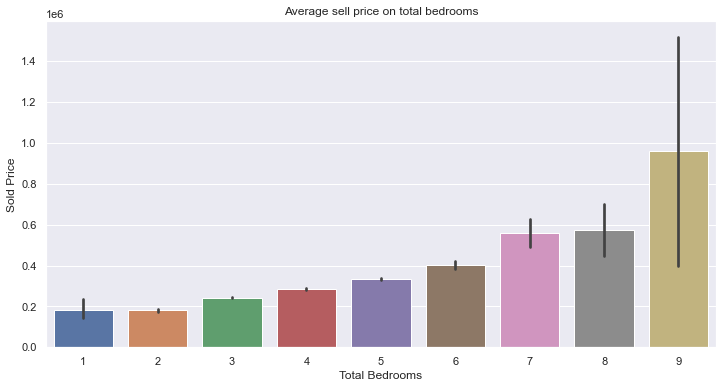

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Sold Price', x = 'Total Bedrooms', data = df)
plt.title('Average sell price on total bedrooms')
plt.show()

As we expect to see, the more numbers of rooms the house has, the highest the average price for the house.

In [10]:
mean=pd.pivot_table(df,
                    index="Total Bathrooms",
                    values="Sold Price",
                    aggfunc='mean',)

In [11]:
mean


,Sold Price
Total Bathrooms,
1,187756.547425
2,243488.653333
3,291792.085153
4,432914.455621
5,586952.351852
6,739384.615385
7,706000.000000


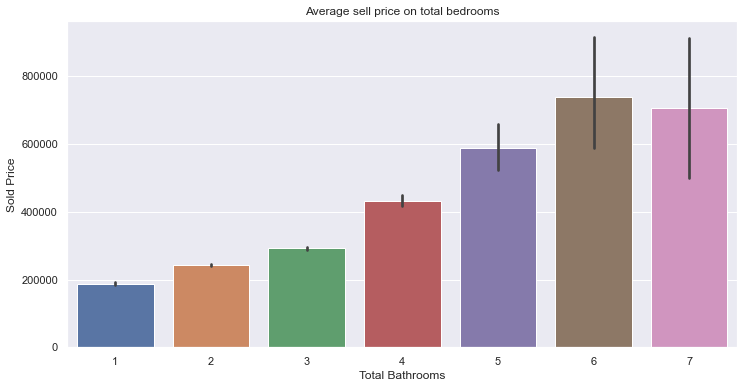

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Sold Price', x = 'Total Bathrooms', data = df)
plt.title('Average sell price on total bedrooms')
plt.show()

We observe a similar pattern for # of Bathrooms and House Price. The more numbers of bathrooms the house has, the highest the average price for the house. Bathrooms and bedrooms should be highly correlated as more people live in a house, the need for bedrooms and bathrooms increases. 

In [13]:
from scipy.stats import pearsonr
corr = pearsonr(df['Total Bathrooms'], df['Total Bedrooms'])
corr

(0.5404128273386507, 1.87257303263783e-310)

The two variables are 54% correlated.

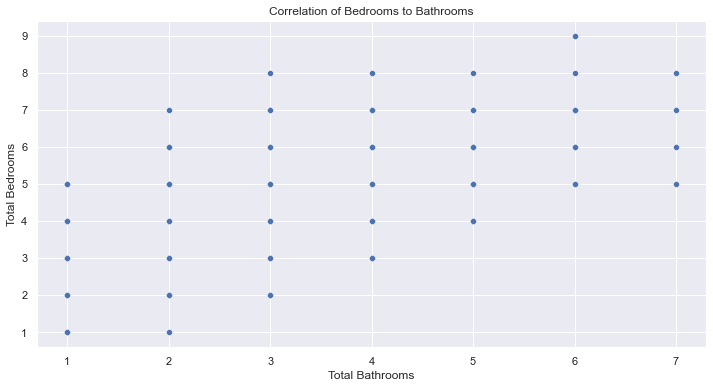

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(y = 'Total Bedrooms', x = 'Total Bathrooms', data = df)
plt.title('Correlation of Bedrooms to Bathrooms')
plt.show()

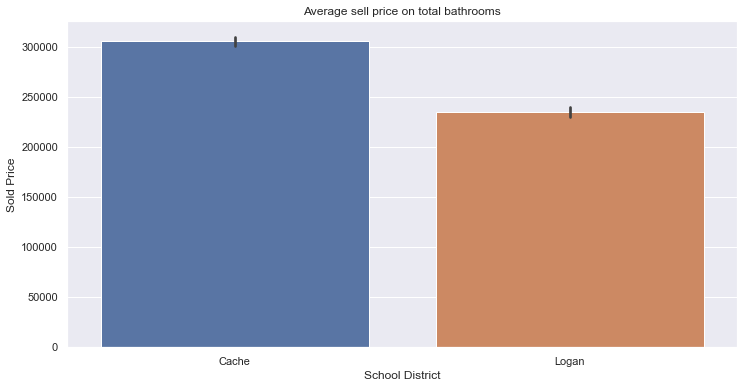

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Sold Price', x = 'School District', data = df)
plt.title('Average sell price on total bathrooms')
plt.show()

The houses in the Cache Disctric have higher average price by more than 50k. I am curious to know if the Cache School Dsitrcit is expcted to provided higher level of education for students.



In [16]:
df[df['Year Built']==0]['Year Built'].count() #count the different values for the variable YEAR BUILT that are equal to 0



0

We wanted to check if there was any missing value before performing any further analysis in the "Year built" variable

In [17]:
df['Year Built'].describe()

count    4110.000000
mean     1989.287105
std        31.284714
min      1879.000000
25%      1976.000000
50%      2001.000000
75%      2012.000000
max      2020.000000
Name: Year Built, dtype: float64

The variable has a range of 141 possible values so we could create 14 bins of 10 values approax.

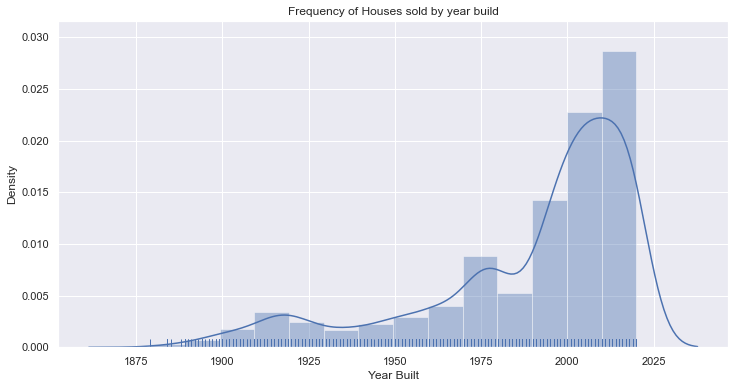

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['Year Built'], bins=14, rug=True)
plt.title('Frequency of Houses sold by year build')
plt.show()

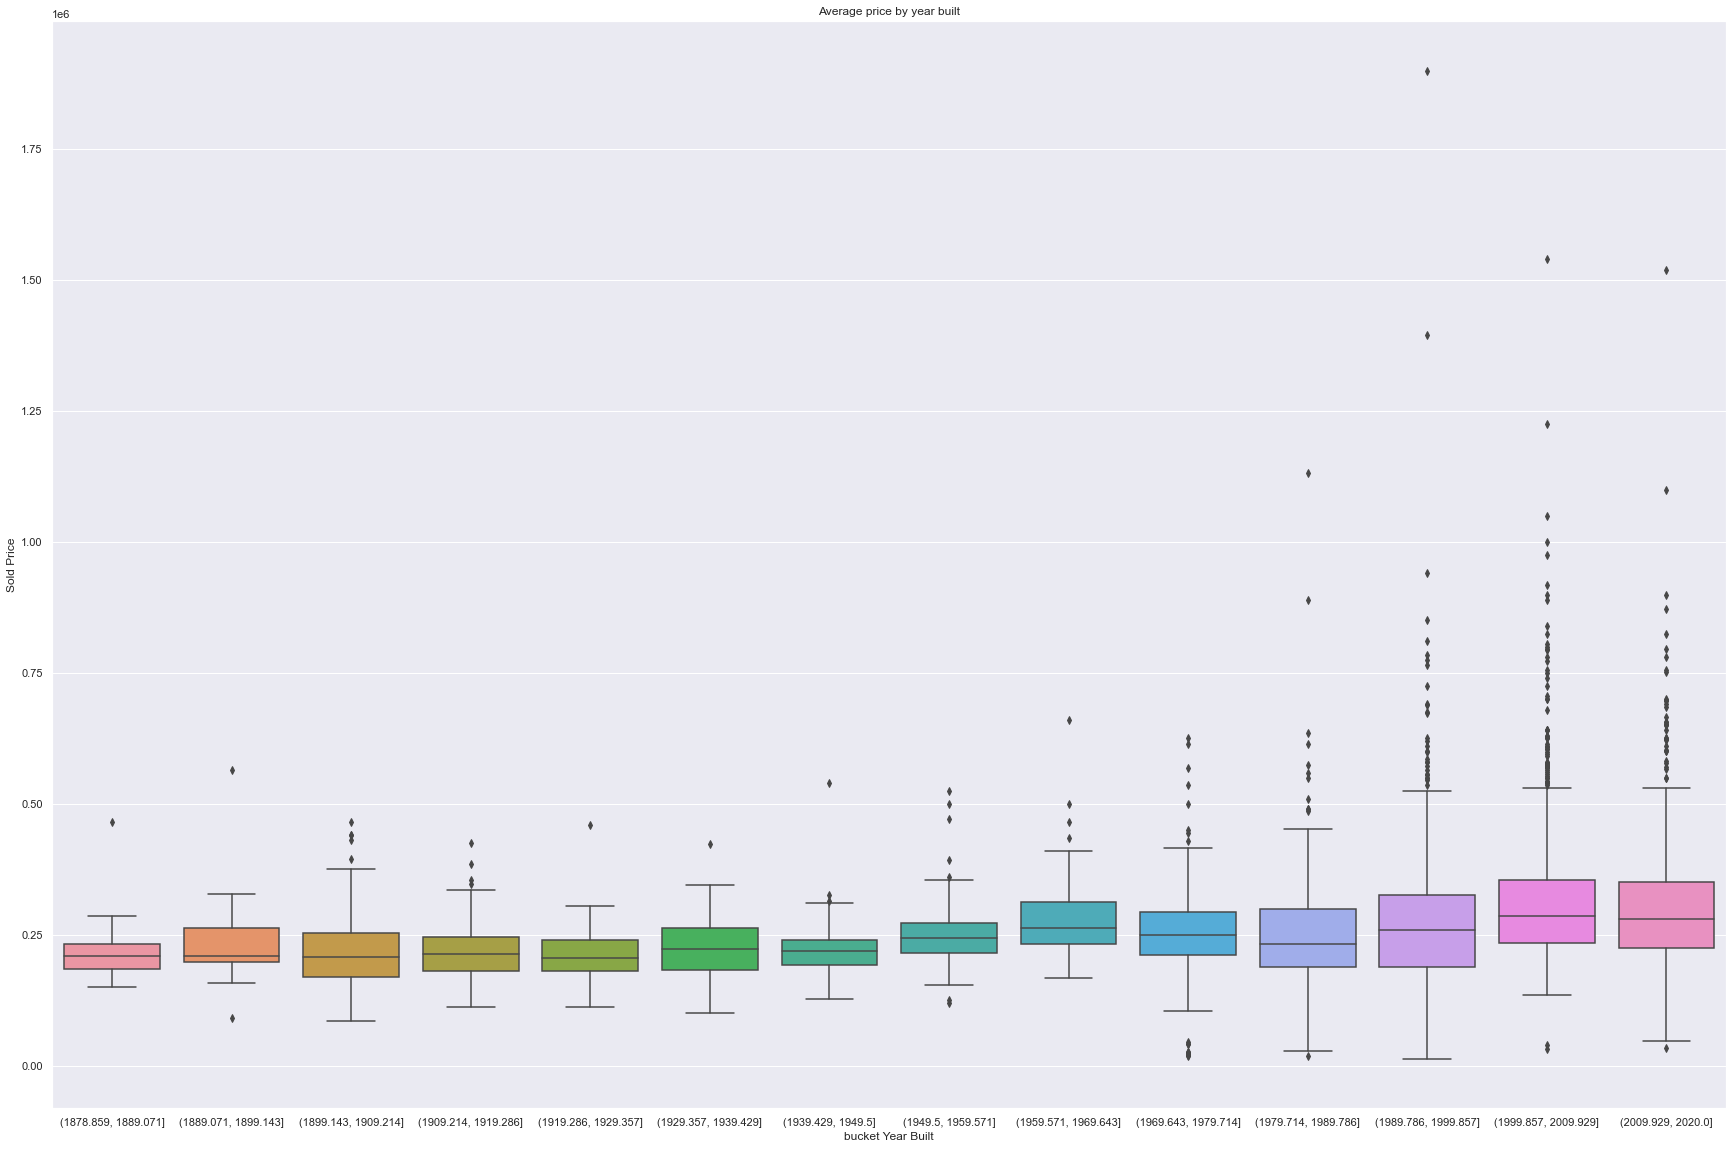

In [19]:
df2=df.copy()
df2['bucket Year Built'] = pd.cut(df2['Year Built'], 14)
plt.figure(figsize=(30,20))
sns.boxplot(y = 'Sold Price', x = 'bucket Year Built', data = df2 )
plt.title('Average price by year built')
plt.show()

In [20]:
mean=pd.pivot_table(df2,
                    index="bucket Year Built",
                    values="Sold Price",
                    aggfunc='mean',)
mean

,Sold Price
bucket Year Built,
"(1878.859, 1889.071]",228566.666667
"(1889.071, 1899.143]",231356.666667
"(1899.143, 1909.214]",224704.320000
"(1909.214, 1919.286]",219615.964789
"(1919.286, 1929.357]",211430.653465
"(1929.357, 1939.429]",223391.128571
"(1939.429, 1949.5]",219768.913978
"(1949.5, 1959.571]",249723.663934
"(1959.571, 1969.643]",275596.612121


The barplot shows the same data in a more appealing way. We cannot observc clear pattern for price and age of the house. The only oberservation we saw is that the highest housing prices ona verage where observed during the Financial/Housing Crisis.

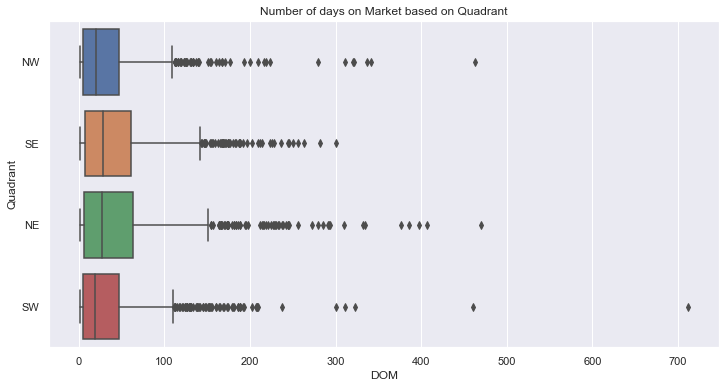

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Quadrant', x = 'DOM', data = df )
plt.title('Number of days on Market based on Quadrant')
plt.show()

###### Houses have relatively the same turnover (buy/sell activity) regarding of the lcoation.

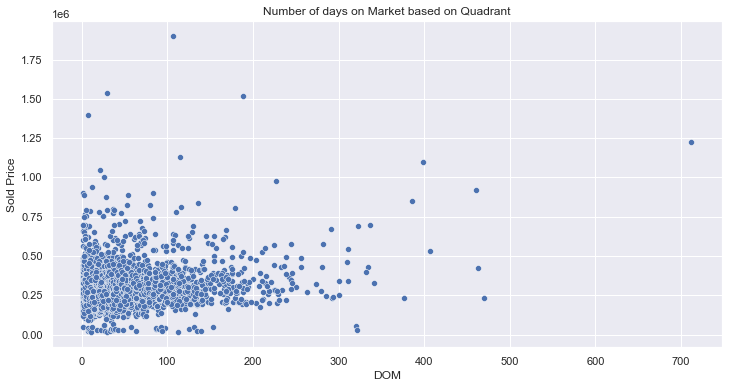

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(y = 'Sold Price', x = 'DOM', data = df )
plt.title('Number of days on Market based on Quadrant')
plt.show()

##### We do not see any correlation between DOM and Sold Price. I would expect that it would affect price negatively assuming all other variables held constant.

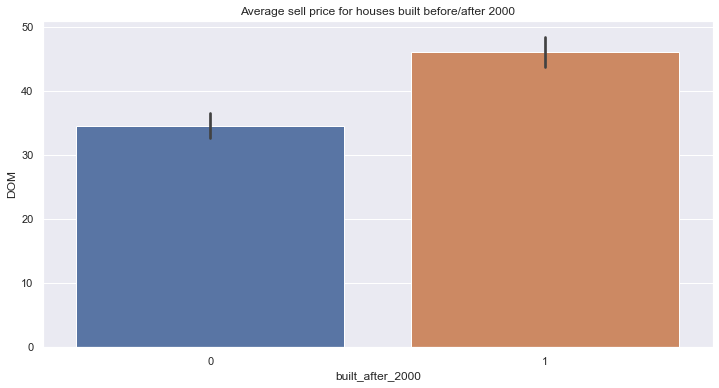

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'DOM', x = 'built_after_2000', data = df)
plt.title('Average sell price for houses built before/after 2000')
plt.show()

# Question 2: SVM Regression (60 points)

In [24]:
categorical = ['HOA Fee', 'Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Year Built', 'Zip', 'year_sold', 'month_sold', 'built_after_2000']

for col in categorical: 
    df[col] = df[col].astype("category")

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['Sold Price', 'DOM', 'Garage Capacity', 'Total Bedrooms',
       'Total Bathrooms', 'Total Square Feet', 'HOA Fee_1', 'HOA Fee_10',
       'HOA Fee_12', 'HOA Fee_13',
       ...
       'month_sold_4', 'month_sold_5', 'month_sold_6', 'month_sold_7',
       'month_sold_8', 'month_sold_9', 'month_sold_10', 'month_sold_11',
       'month_sold_12', 'built_after_2000_1'],
      dtype='object', length=275)

### Part 2

In [26]:
import sklearn

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,Sold Price,DOM,Garage Capacity,Total Bedrooms,Total Bathrooms,Total Square Feet,HOA Fee_1,HOA Fee_10,HOA Fee_12,HOA Fee_13,...,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9,month_sold_10,month_sold_11,month_sold_12,built_after_2000_1
0,-0.900508,-0.689423,0.159024,-0.694402,-1.853418,-1.276179,-0.041305,-0.07823,-0.031212,-0.0156,...,-0.283622,-0.334234,-0.358470,-0.359765,-0.361489,3.217700,-0.318255,-0.264112,-0.239522,-1.035672
1,-0.484727,-0.670031,0.159024,0.151225,-0.678414,-0.266234,-0.041305,-0.07823,-0.031212,-0.0156,...,-0.283622,-0.334234,-0.358470,2.779589,-0.361489,-0.310781,-0.318255,-0.264112,-0.239522,-1.035672
2,-0.061309,-0.514889,0.159024,-0.694402,-1.853418,-0.337693,-0.041305,-0.07823,-0.031212,-0.0156,...,-0.283622,-0.334234,-0.358470,-0.359765,-0.361489,-0.310781,-0.318255,3.786267,-0.239522,-1.035672
3,-0.908994,-0.476103,-0.755088,0.151225,-1.853418,-0.429159,-0.041305,-0.07823,-0.031212,-0.0156,...,-0.283622,-0.334234,2.789633,-0.359765,-0.361489,-0.310781,-0.318255,-0.264112,-0.239522,-1.035672
4,-0.875052,-0.223998,-1.669200,0.151225,-0.678414,-0.992251,-0.041305,-0.07823,-0.031212,-0.0156,...,-0.283622,-0.334234,-0.358470,-0.359765,-0.361489,3.217700,-0.318255,-0.264112,-0.239522,-1.035672


### Part 3

In [29]:
y = df_sc['Sold Price']
X = df_sc.drop('Sold Price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

### Part 4

In [30]:
from sklearn.svm import SVR
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)
SVR()
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
3940,0.830500,0.768114
2470,0.312895,0.350005
351,-0.620492,-0.541199
3137,-0.485575,-0.416473
2605,0.211071,0.398513


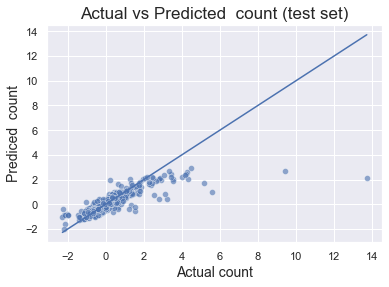

In [31]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

Answer part 4, part 4

In [32]:
SVM_regression.score(X_test, y_test)

0.6533637379975381

In [33]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.65

### Part 5

In [34]:
my_param_grid = {'C': [1,10,100], 'gamma': ['scaled',0.1,0.01], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

### Part 6

In [35]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)
# verbose just means the text output describing the process. (the greater the number the more detail you will get).
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   6.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   6.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   5.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   5.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   5.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   4.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scaled', 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [36]:
grid.best_params_
grid.best_estimator_
y_hat_optimized = grid.predict(X_test)
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
3940,0.830500,0.768114,0.707433
2470,0.312895,0.350005,0.269161
351,-0.620492,-0.541199,-0.379154
3137,-0.485575,-0.416473,-0.410560
2605,0.211071,0.398513,0.444490


### Part 7

In [37]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.69

### Part 8

In [38]:
from sklearn.model_selection import cross_val_score
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.5807

# Question 3

### Part 1

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [40]:
rand_state = 1000
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/HW_data/HW8/Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [41]:
df["liquid"] = pd.NaT
liquid = []
for row in df['DOM']:
    if row < np.average(df['DOM']):
        liquid.append(1)
    else:
        liquid.append(0)
df['liquid'] = liquid
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000,liquid
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0,1
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0,1
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0,1
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0,1
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0,1


In [42]:
categorical = ['HOA Fee', 'Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Year Built', 'Zip', 'year_sold', 'month_sold', 'built_after_2000', 'liquid']

for col in categorical: 
    df[col] = df[col].astype("category")

In [43]:
pd.crosstab(df['liquid'],df['liquid'], normalize='all')*100

liquid,0,1
liquid,,
0,34.355231,0.000000
1,0.000000,65.644769


With the values being 65/34 I would say that this relativley balanced.

In [44]:
df = pd.get_dummies(df, drop_first=True)

### Part 2

In [45]:
y = df['liquid_1']
X = df.drop('liquid_1', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

### Part 3

In [46]:
from sklearn.svm import SVC
# Fitting SVM regression to the Training set
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)
# Predicting the Test set results
y_hat = SVM_classification.predict(X_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.tail(20)

,y_test,y_hat
3469,1,1
3227,0,1
3058,1,1
3955,0,1
1570,1,1
42,0,1
2397,1,1
3696,1,1
942,1,1
4052,1,1


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf', class_weight=None):
    svc= SVC(C=C, gamma=gamma, kernel=kernel, class_weight=class_weight)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    mcc     = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(mcc))
    print("-----------------------------------------")
    return cm_labled

In [48]:
my_SVM_report(X_train, y_train, X_test,y_test, kernel='rbf')

-----------------------------------------
Accuracy  = 0.6399
Error_rate  = 0.3601
Precision = 0.65
Recall    = 0.98
f1_score  = 0.78
MCC       = -0.0
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,6,285
Actual : positive,11,520


I would say that given that the data is balanced we can use the accuracy, the model perform betters than a random (50%) skill. However, I would say that false negative( predicted no liquid, but actually liquid) has bigger weight than a false positive, therefore, I would use F1 score or Matthew correlation coefffeint

You cannot plot ROC curve and AUC score using SVM because there is no probability.

### Part 4

In [50]:
my_param_grid = {'C': [1,100,1000], 'gamma': ['scaled',0.01,0.001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scaled', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [51]:
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score)
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=f1)
# verbose just means the text output describing the process.  (the greater the number the more detail you will get).
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scaled, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.1s
[CV] C=1, gamma=scaled, kernel=rbf ...................................
[CV] .................... C=1, gamma=scaled, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   5.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   5.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   5.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   5.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   5.6s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.6min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': ['scaled', 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score), verbose=2)

### Part 5

In [52]:
grid.best_params_
grid.best_estimator_
grid.cv_results_
y_hat_optimized = grid.predict(X_test)
predictions['y_hat_optimized'] = y_hat_optimized
predictions.tail(20)

,y_test,y_hat,y_hat_optimized
3469,1,1,1
3227,0,1,1
3058,1,1,1
3955,0,1,1
1570,1,1,1
42,0,1,1
2397,1,1,1
3696,1,1,1
942,1,1,1
4052,1,1,1


### Part 6

In [53]:
my_SVM_report(X_train, y_train, X_test,y_test,C=1000, gamma=0.001)

-----------------------------------------
Accuracy  = 0.6582
Error_rate  = 0.3418
Precision = 0.66
Recall    = 0.99
f1_score  = 0.79
MCC       = 0.13
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,17,274
Actual : positive,7,524


### Part 7

In [54]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = SVC(C=1000, gamma=0.001), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
accuracy
accuracy_CV=round(accuracy.mean(),4)
accuracy_CV

0.6737

### Part 8

It depends what he is doing with the homes. If he wants to buy a home or is trying to sell homes, I think Jeff would want to know which houses are more liquid or not so he can see how fast some income should be produced. Using this machine learning model he can find out if a house will sell fast or be on the market for a long time. Knowing this gives him power to decide which houses to try to sell. If he is just trying to buy a home he can use this model to understand how fast he needs to be when trying to buy the home he wants.

Real estate has historicailly considered a illiquid asset, However, as a potential real estate investor/asset manager, we need to have a time horizon for an exit